# INTELIGENCIA ARTIFICIAL: EB Ejercicios Tema 3: REGRESIÓN LINEAL 
## EJERCICIO: ¿Cómo evaluar modelos de machine learning?
**Evaluar** el modelo de regresión lineal obtenido en la EPD 2.1 para predecir los beneficios de un restaurante según la población de la ciudad. Use diferentes métodos de evaluación y compare los resultados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Para Ejercicio de Evaluación usando Holdout
from random import randrange
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Para Ejercicio de Evaluación usando Cross Validation
from random import randrange
from sklearn.model_selection import KFold
from sklearn import metrics

## A) EJERCICIO BASE 

### 1) Cargar los datos de entrada
Los datos están almacenados en el fichero ex1data1.txt.

In [4]:
def read_file(file_name):
    # Reading file with data
    print('Loading Data ...', file_name)
    file = pd.read_csv(file_name, names=["poblacion","beneficio"])
    X = pd.DataFrame({'poblacion': file['poblacion']})
    y = pd.DataFrame({'beneficio': file['beneficio']})

    return X, y

In [5]:
X, y = read_file('ex1data1.txt')

Loading Data ... ex1data1.txt


#### 1.1) Visualizar los datos
Visualizar las dimensiones de la matriz de atributos, del vector clase y las primeras 5 filas de los atributos junto a su clase. 
En el caso de la regresión lineal univariable, representar en una gráfica el atributo de entrada y la clase.

In [6]:
def plotData(X, y):
    plt.scatter(X,y, marker = "x", c = "red")
    plt.xlabel("Population of City in 10,000")
    plt.ylabel("Profit in $10,000")
    plt.xticks(np.arange(5, 26, 5), rotation=45) 
    plt.yticks(np.arange(-5, 26, 5), rotation=45)
    plt.xlim(5,25) # Estamos limitando el eje x. Si los datos cambian, probablemente habrá que modificar estos valores
    plt.ylim(-5,25) # Estamos limitando el eje y. Si los datos cambian, probablemente habrá que modificar estos valores
    plt.show()

El tamaño de X es:  97  filas y  1  columna(s)  (97, 1)
La longitud del vector y es:  97 (97, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 6.1101  |  17.592
	 5.5277  |  9.1302
	 8.5186  |  13.662
	 7.0032  |  11.854
	 5.8598  |  6.8233


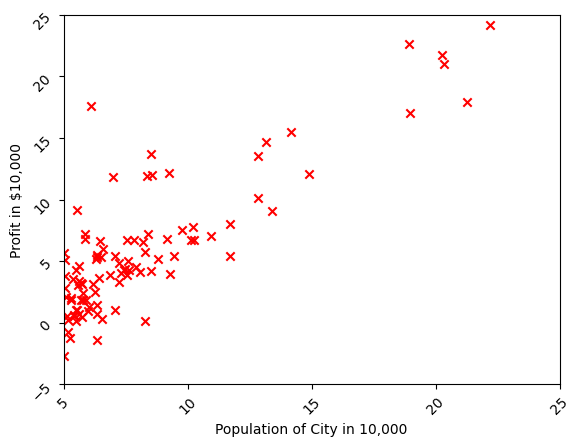

In [7]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['poblacion'][i],  " | ", y['beneficio'][i]) 
# Recordar: X[:5] selecciona las 5 primeras filas de X.

plotData(X, y)

### 2) Hipótesis y función coste
La hipótesis del modelo de regresión lineal univariable es: 
\begin{equation}
h_{\theta}(x)=\theta_0 + \theta_1 \cdot x \quad \mbox{ ó  } \quad h_{\theta}(x)=\theta^T \cdot x
\end{equation}
Si queremos representar $X$ como la matriz/dataframe con todos los datos de entrada, la hipótesis es equivalente a: 
\begin{equation}
h_{\theta}=X \cdot \theta
\end{equation}
donde: 
*  $X$ contiene todas las filas y atributos del conjunto de training (sin incluir la clase).
*  $\theta$ es un vector columna de longitud: el número de atributos del conjunto de training (sin incluir la clase) + 1 ($\theta_0$ ).

El objetivo de la regresión lineal es minimizar el coste de la función. Si la función coste es el error cuadrático:
\begin{equation}
J(\theta)=\frac{1}{2 \cdot m}\sum_{i=1}^{m} (h_{\theta}-y)^2 = \frac{1}{2 \cdot m}\sum (X \cdot \theta-y)^2
\end{equation}

In [43]:
def computeCost(X, y, theta):

    m = len(y) # Numero de instancias en el training
    h = np.dot(X, theta) # Hipótesis del modelo de regresión lineal 
    J = ((np.sum(np.power((h - y),2), axis=0))/(2*m)) # Coste
  
    return J

#### 2.1) Añadir $x_0$
x0 se añade como primera columna a X con todos sus elementos a 1. Esta operación se realiza para poder calcular la hipótesis h que viene dada por el modelo lineal

In [44]:
ones = np.ones((len(y), 1)) # Crear un array de 1
X['uno'] = ones # Añadir a X # Es lo mismo que X['uno'] = 1
X = X[['uno', 'poblacion']]  # Poner 'uno' como primera columna

#### 2.2) Inicializar $\theta$

In [45]:
num_atributos = X.shape[1] # Si esta operación la hacemos antes de añadir la columna de 1 a X, debemos poner X.shape[1]+1
theta = np.zeros((num_atributos,1), dtype=np.float64)

Ejecutamos la función coste

In [46]:
J_base = computeCost(X, y, theta)
print("\nEl coste inicializando theta a 0 debe ser aproximadamente 32.072734: ", J_base)

# Si queremos probar con otros valores de theta: 
J_prueba = computeCost(X, y, [[-1], [2]]) # Lo mismo que: computeCost(X, y, np.array([[-1],[2]]))
print("\nEl coste probando con theta0=-1 y theta1=2 es: ", J_prueba)


El coste inicializando theta a 0 debe ser aproximadamente 32.072734:  beneficio    32.072734
dtype: float64

El coste probando con theta0=-1 y theta1=2 es:  beneficio    54.242455
dtype: float64


### 3) Descenso del Gradiente
El método de descenso del gradiente se implementa en una función que recibe como parámetro, además de los datos X e y, los parámetros theta, alpha y el número de iteraciones. Estos dos últimos se pueden inicializar a 0.01 y 1500 respectivamente. Si la función coste es el error cuadrático, en cada iteración del descenso del gradiente se calcula:  
\begin{equation}
\theta=\theta - \alpha \frac{1}{m} (X^T \cdot (X \cdot \theta - y))
\end{equation}

La función deberá devolver los parámetros theta finales y un histórico con el coste en cada iteración que se debe visualizar. Mostrar por pantalla los valores de theta finales.


In [47]:
def gradientDescent(X, y, theta, alpha, iterations):

    m = len(y) # Numero de instancias en el training
    current_iter = [] # Lista vacía para crear el histórico en un dataframe
    current_cost = [] # Lista vacía para crear el histórico en un dataframe

    for iter in range(iterations):
        h = np.dot(X,theta) # Hipótesis
        theta = theta - alpha*(1/m)*(np.dot(X.T,(h-y)))

        # Guardar el coste J de cada iteración
        current_iter.append(iter) # Añadir la iteración a una lista
        current_cost.append(computeCost(X, y, theta)) # Añadir el coste a una lista

    J_history = pd.DataFrame({'iteracion': current_iter, 'coste': current_cost}) # Crear el dataframe histórico iteracion-coste

    return theta, J_history # Último theta encontrado y dataframe histórico J_history

#### 3.1) Visualizar el histórico coste-iteración

In [48]:
def plotIterationsVsCost(J_history, alpha, iteraciones):
    plt.plot(J_history['iteracion'], J_history['coste'])
    plt.xlabel('Iteraciones')
    plt.ylabel('Coste')
    plt.title('Descenso del gradiente con alpha: '+str(alpha)+' y '+str(iteraciones)+' iteraciones')
    plt.show()

#### 3.2) Visualizar el óptimo encontrado para el modelo con curvas de nivel

In [49]:
def plotData_cost(X, y, theta):

    # Grid sobre el que vamos a calcular J
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)

    # Inicializar J_vals a una matriz de ceros
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # Rellenar J_vals
    for i in range(1, len(theta0_vals)):
        for j in range(1, len(theta1_vals)):
            theta_ij = [[theta0_vals[i]], [theta1_vals[j]]]
            J_vals[i][j] = computeCost(X, y, theta_ij)

    # Debido a la forma en la que las mallas funcionan en el comando contour, 
    # debemos transponer J_vals antes de llamar a dicha función
    J_vals = J_vals.T

    fig1, ax = plt.subplots(1,1)
    contour = ax.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
    fig1.colorbar(contour)
    plt.xlabel("theta_0")
    plt.ylabel("theta_1")
    plt.plot(theta[0], theta[1], marker = 'x', c='red')
    plt.show()

#### 3.3) Visualizar gráficamente el modelo obtenido

In [50]:
def plotData_linearRegression(X, y, theta):
    plt.scatter(X['poblacion'],y, marker="x", c="red", label="Training data") # Representación del conjunto de datos
    plt.plot(X['poblacion'], np.dot(X, theta), c='blue', label="Linear regression") # Representación de la recta: h = X·theta
    plt.xlabel("Population of City in 10,000")
    plt.ylabel("Profit in $10,000")
    plt.xlim(5, 25) # Cuidado: estamos limitando el eje X 
    plt.ylim(-5, 25) # Cuidado: estamos limitando el eje y
    plt.legend()
    plt.show()

## B) EJERCICIO DE EVALUACIÓN USANDO HOLDOUT
Se divide el dataset en 70% para entrenamiento y 30% para test usando una de las funciones holdout suministradas. La función deberá devolver: X_training, y_training, X_test e y_test.
Después, obtener el modelo de regresión lineal usando el descenso del gradiente con el conjunto de entrenamiento (training) para alpha=0.01 y 1500 iteraciones. Visualizar la función coste J a través de las iteraciones. Visualizar el modelo obtenido (si es regresión lineal univariable).
Por último, predecir el conjunto de test y calcular el error.

### 1) Cargar los datos de entrada diviendo el dataset en 70-30 mediante holdout.

In [51]:
# OPCION 1
def holdout_opcion1(X, y, percentage=0.6):
  index_training = [] # Lista vacía con los indices del training
  while len(index_training) < round(percentage*len(X)): # Mientras el número de elementos en la lista de índices del training sea menor del que debe ser:
    random_index = randrange(len(X)) # indices random dentro del rango de X
    if random_index not in index_training: # si el indice random no esta en la lista de indices del training
      index_training.append(random_index) # Añado el indice random a los indices que formarán parte del training

  # Una vez tenemos en index_training los índices que formaran parte del conjunto de training:
  X_training = X.iloc[index_training]
  y_training = y.iloc[index_training]
  X_test = X.iloc[~X.index.isin(index_training)] # ~ significa NOT
  y_test = y.iloc[~y.index.isin(index_training)] # ~ significa NOT
  print("El tamaño del training debe ser: ", round(percentage*len(X)), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  print("El tamaño del test debe ser: ", len(X)-round(percentage*len(X)), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))
  
  # Reseteamos los índices de todos los conjuntos
  X_training = X_training.reset_index(drop=True)
  y_training = y_training.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)
  
  return X_training, y_training, X_test, y_test

# OPCION 2
def holdout_opcion2(X, y, percentage=0.6):
  X_training = X.sample(round(percentage*len(X))) # Selecciona aleatoriamente el numero de filas indicado
  y_training = y.iloc[X_training.index] # Selecciona las filas del X_training
  X_test = X.iloc[~X.index.isin(X_training.index)] # ~ significa NOT
  y_test = y.iloc[~X.index.isin(X_training.index)] # ~ significa NOT

  print("El tamaño del training debe ser: ", round(percentage*len(X)), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  print("El tamaño del test debe ser: ", len(X)-round(percentage*len(X)), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))

  # Reseteamos los índices de todos los conjuntos
  X_training = X_training.reset_index(drop=True)
  y_training = y_training.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)
  
  return X_training, y_training, X_test, y_test

# OPCION 3
def holdout_opcion3(X, y, percentage=0.6):
  X_training, X_test, y_training, y_test = train_test_split(X,y, test_size=1-percentage, random_state=1) # Cuidado con el orden de la salida
  # random_state: controla el barajado aplicado a los datos antes de aplicar la división. Si le pasamos un int, la salida se reproducirá siempre que llamemos a la función
  
  print("El tamaño del training debe ser: ", round(percentage*len(X)), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  print("El tamaño del test debe ser: ", len(X)-round(percentage*len(X)), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))
  
  # Reseteamos los índices de todos los conjuntos
  X_training = X_training.reset_index(drop=True)
  y_training = y_training.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)

  return X_training, y_training, X_test, y_test

In [52]:
# Importante: Cargar el dataset X, y si no lo tienes ya cargado.

X_training, y_training, X_test, y_test = holdout_opcion1(X, y, 0.7)
#X_training, y_training, X_test, y_test = holdout_opcion2(X, y, 0.7)
#X_training, y_training, X_test, y_test = holdout_opcion3(X, y, 0.7)

El tamaño del training debe ser:  68  - Comprobación: tamaño X_training es  68  y tamaño y_training es 68
El tamaño del test debe ser:  29  - Comprobación: tamaño X_test es  29  y tamaño y_test es 29


### 2) Hipótesis y función coste

#### 2.1) Añadir $x_0$

In [53]:
# COMPLETAR
# Incluir x0 (antes o después de cargar el dataset X, y). 
# Tanto X_training como X_test deben incluir una columna (será x0) con todos los elementos a 1.

#### 2.2) Inicializar $\theta$

In [54]:
# COMPLETAR

theta = np.zeros((X.shape[1],1), dtype=np.float64)

### 3) Descenso del Gradiente

In [55]:
# COMPLETAR 
iterations = 1500
alpha = 0.01
theta_optimo_holdout, J_history_holdout = gradientDescent(X_training, y_training, theta, alpha, iterations)

print('Theta encontrado con el descenso del gradiente: \n', theta_optimo_holdout)
print('\nCoste alcanzado en la última iteración : ', J_history_holdout[J_history_holdout['iteracion']==iterations-1]['coste']) 

Theta encontrado con el descenso del gradiente: 
 [[-3.65121077]
 [ 1.16231915]]

Coste alcanzado en la última iteración :  1499    beneficio    4.594564
dtype: float64
Name: coste, dtype: object


#### 3.1) Visualizar el histórico coste-iteración
¿Ha encontrado el óptimo el descenso del gradiente?

C:\Users\danit\anaconda3\envs\quantum-env\lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\danit\anaconda3\envs\quantum-env\lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


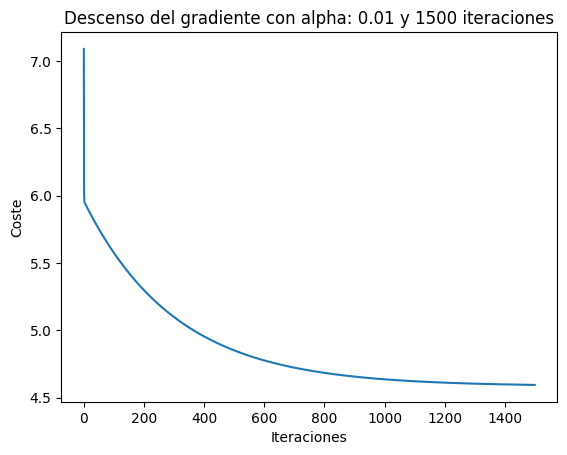

In [57]:
# COMPLETAR 
plotIterationsVsCost(J_history_holdout, alpha, iterations)

#### 3.2) Visualizar el óptimo encontrado para el modelo con curvas de nivel

C:\Users\danit\AppData\Local\Temp\ipykernel_29052\1729150599.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  J_vals[i][j] = computeCost(X, y, theta_ij)


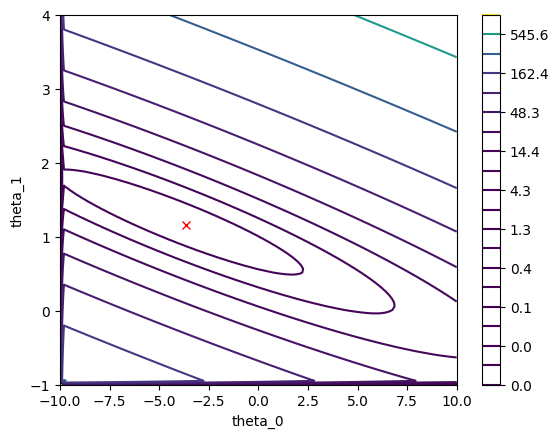

In [58]:
# COMPLETAR
plotData_cost(X_training, y_training, theta_optimo_holdout)

#### 3.3) Visualizar gráficamente el modelo obtenido

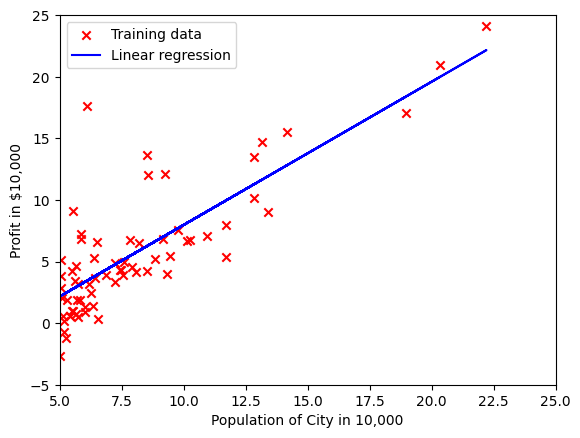

In [59]:
# COMPLETAR 
plotData_linearRegression(X_training, y_training, theta_optimo_holdout)

#### 3.4) Predecir el conjunto de test usando el modelo aprendido con el conjunto de training. Calcular el error MAE y MSE.
Las métricas que usaremos están en la EB T2 diap 39: 


*   Error absoluto medio (MAE): 
\begin{equation}
MAE =\frac{1}{m}\sum_{i=1}^{m} |y_i - \widehat{y}_i|
\end{equation}
*   Error cuadrático medio (MSE): 
\begin{equation}
MSE =\frac{1}{m}\sum_{i=1}^{m} (y_i - \widehat{y}_i)^2 
\end{equation}



In [62]:
# COMPLETAR
# Predicción de todo el conjunto de test
y_predicted = np.dot(X_test, theta_optimo_holdout) 

In [71]:
# COMPLETAR
# Calcular los errores
m = len(y_test)

# MAE: 
error_absoluto_medio_holdout = (1/m)*np.sum(np.abs(y_test-y_predicted), axis=0)
print("El error absoluto medio es: ", error_absoluto_medio_holdout)
MAE_sklearn_holdout = metrics.mean_absolute_error(y_test, y_predicted)
print("El error absoluto medio usando sklearn es: ", MAE_sklearn_holdout)

# MSE: 
error_cuadratico_medio_holdout = (1/m)*np.sum(np.power(y_test-y_predicted,2), axis=0)
print("\n\nEl error cuadrático medio es: ", error_cuadratico_medio_holdout)
MSE_sklearn_holdout = metrics.mean_squared_error(y_test, y_predicted)
print("El error cuadrático medio usando sklearn es: ", MSE_sklearn_holdout)

El error absoluto medio es:  beneficio    2.221975
dtype: float64
El error absoluto medio usando sklearn es:  2.2219745388087997


El error cuadrático medio es:  beneficio    8.449365
dtype: float64
El error cuadrático medio usando sklearn es:  8.44936503327858


## C) EJERCICIO DE EVALUACIÓN USANDO CROSS-VALIDATION
La evaluación mediante validación cruzada consiste en la división del conjunto de datos en K bolsas, haciendo que cada una de estas bolsas sea el conjunto de test mientras que las K-1 restantes sean el conjunto de entrenamiento. 

De esta forma, se calculan K modelos y el error que cada uno de ellos comete al predecir el conjunto de test correspondiente. 

La media de los K errores es el error que determina si la regresión lineal es un buen método de aprendizaje y la predicción de una instancia desconocida se estimaría con la media de la predicción obtenida por cada modelo. 

#### 1) Cargar los datos de entrada y dividirlo en los conjuntos de entrenamiento y test mediante validación cruzada.
Usar una de las siguientes funciones para construir los índices que nos ayudarán a crear las diferentes bolsas en las que se dividirá el conjunto de datos.

In [74]:
def cross_validation_opcion1(X, y, K):
  tam_folds = round(len(X)/K) # Tamaño de cada bolsa considerando que creamos K bolsas
  data_particiones = [] # Lista que devolveremos con los índices de cada bolsa
  all_bolsa = [] # Lista de indices totales en el que vamos a añadir todos los índices que se van incluyendo en data_particiones para controlar que no se repiten
  for i in range(K): # Para cada bolsa
    fold = [] # Lista vacío con los indices de la bolsa, deberá tener tamaño tam_folds
    while len(fold) < tam_folds:
      random_index = randrange(len(X)) # indices random dentro del rango de X
      if random_index not in all_bolsa: # si el indice random no esta en la lista de indices totales
        fold.append(random_index) # Añado el indice random a los indices que formaran parte de la bolsa
        all_bolsa.append(random_index) # Añado el indice random a la lista de indices totales
    data_particiones.append(fold) # Cuando fold ya esté correctamente completado, antes de pasar a la siguiente bolsa, se añadirán todos esos índices a la lista que devolveremos
  return data_particiones

def cross_validation_opcion2(X, y, K):
  cv = KFold(n_splits=K, random_state=None, shuffle=True) # random_state como anteriormente, shuffle = True: Se barajan los datos antes de divirlos en lotes
  data_particiones_sk = [] # Lista vacía donde añadiremos los índices del test cada bolsa
  for train_ix, test_ix in cv.split(X): # cv.split(X) genera índices para dividir los datos en training y test
    data_particiones_sk.append(test_ix)
  return data_particiones_sk

In [75]:
K = 5 # Número de particiones para cross-validation

indices = cross_validation_opcion1(X,y,K) # indices serán los índices del conjunto de test
#indices = cross_validation_opcion2(X,y,K) # indices serán los índices del conjunto de test

### 2) Hipótesis y función coste

#### 2.1) Añadir $x_0$

In [ ]:
# COMPLETAR

#### 2.2) Inicializar $\theta$

In [72]:
# COMPLETAR
theta = np.zeros((X.shape[1],1))

### 3) Descenso del Gradiente considerando cross-validation
Una vez creados los conjuntos, obtener el modelo y el error para cada uno de ellos. Para obtener el modelo, ejecutar el descenos del gradiente llamando a la función correspondiente con el conjunto de entrenamiento correspondiente.

In [73]:
iterations = 1500 # Inicialización de alpha y número de iteraciones
alpha = 0.01

In [81]:
# COMPLETAR 
error_abs = [] # Lista vacía para almacenar los errores de cada conjunto train/test y luego calcular el error medio cometido
arr_J_history = [] # Lista vacía para almacenar los J_history de cada conjunto train/test y luego poder visualizar la función coste J a través de las iteraciones de cada modelo
arr_theta_optimo = [] # Lista vacía para almacenar los theta optimos de cada conjunto train/test
arr_id_bolsa = [] # Lista vacía para almacenar el id de la bolsa con los índices de cada conjunto train/test
arr_X_training = [] # Lista vacía para almacenar cada conjunto de training X
arr_y_training = [] # Lista vacía para almacenar cada conjunto de training y

for i in range(0,K): # Para cada bolsa
  print("\nBOLSA: ", i)
  # Crear los conjuntos test/training
  X_test = X.loc[indices[i]]
  y_test = y.loc[indices[i]]
  X_training = X.loc[~X.index.isin(indices[i])]
  y_training = y.loc[~y.index.isin(indices[i])]

  print("El tamaño del training debe ser: ",len(X)-round(len(X)/K), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  print("El tamaño del test debe ser: ", round(len(X)/K), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))
  
  # Reseteamos los índices de todos los conjuntos
  X_training = X_training.reset_index(drop=True)
  y_training = y_training.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)

  # Descenso del gradiente
  theta_optimo_cv, J_history_cv = gradientDescent(X_training, y_training, theta, alpha, iterations)
  print('\tTheta encontrado con el descenso del gradiente: \n', theta_optimo_cv)
  print('\n\tCoste alcanzado en la última iteración : ', J_history_cv[J_history_cv['iteracion']==iterations-1]['coste']) 
  arr_theta_optimo.append(theta_optimo_cv) # Añadir theta_optimo_cv a la lista de theta optimos
  arr_J_history.append(J_history_cv) # Añadir J_history_cv a la lista de J_history
  arr_id_bolsa.append(i) # Añadir el id de la bolsa que se está recorriendo a la lista de ids
  arr_X_training.append(X_training) # Añadir el X_training a la lista de X_training
  arr_y_training.append(y_training) # Añadir el y_training a la lista de y_training

  # Predicción de todo el conjunto de test
  y_predicted = np.dot(X_test, theta_optimo_cv)

  # Errores
  MAE_sklearn_cv = metrics.mean_absolute_error(y_test, y_predicted)
  print("\tEl error absoluto medio usando sklearn es: ", MAE_sklearn_cv)
  MSE_sklearn_cv = metrics.mean_squared_error(y_test, y_predicted)
  print("\tEl error cuadrático medio usando sklearn es: ", MSE_sklearn_cv)
  error_abs.append(MAE_sklearn_cv) # Añadir MAE a la lista de errores
    
  print("--------------")

print("\n\nFIN\n\nError medio usando descenso del gradiente: ", np.sum(error_abs,axis=0)/K)
df_cv = pd.DataFrame({'id':arr_id_bolsa, 'theta': arr_theta_optimo, 'J_history':arr_J_history, 'X_training':arr_X_training,'y_training':arr_X_training}) # Crear dataframe con todo lo necesario para poder realizar las visualizaciones que se nos piden a continuación: ids, thetas optimos, J_history, ....


BOLSA:  0
El tamaño del training debe ser:  78  - Comprobación: tamaño X_training es  78  y tamaño y_training es 78
El tamaño del test debe ser:  19  - Comprobación: tamaño X_test es  19  y tamaño y_test es 19
	Theta encontrado con el descenso del gradiente: 
 [[-3.61053038]
 [ 1.18464809]]

	Coste alcanzado en la última iteración :  1499    beneficio    4.453768
dtype: float64
Name: coste, dtype: object
	El error absoluto medio usando sklearn es:  2.6592472240844085
	El error cuadrático medio usando sklearn es:  9.389788310570601
--------------

BOLSA:  1
El tamaño del training debe ser:  78  - Comprobación: tamaño X_training es  78  y tamaño y_training es 78
El tamaño del test debe ser:  19  - Comprobación: tamaño X_test es  19  y tamaño y_test es 19
	Theta encontrado con el descenso del gradiente: 
 [[-3.30083843]
 [ 1.14428364]]

	Coste alcanzado en la última iteración :  1499    beneficio    4.568081
dtype: float64
Name: coste, dtype: object
	El error absoluto medio usando sklear

#### 3.1) Visualizar el histórico coste-iteración
De cada conjunto training/test

In [ ]:
# COMPLETAR

#### 3.2) Visualizar el óptimo encontrado para el modelo con curvas de nivel
De cada conjunto training/test

In [ ]:
# COMPLETAR

#### 3.3) Visualizar gráficamente el modelo obtenido
De cada conjunto training/test

In [ ]:
# COMPLETAR